In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv"
df_weather = pd.read_csv(link)

In [ ]:
link_main = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_main_2018.csv"
link_opinion = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_opinion_2018.csv"
df_main = pd.read_csv(link_main)
df_opinion = pd.read_csv(link_opinion)
print(df_main.head())
print(df_opinion.head())

         DATE  MAX_TEMPERATURE_C  ...  DEWPOINT_MAX_C  WINDTEMP_MAX_C
0  2018-01-01                 12  ...               8               7
1  2018-01-02                 13  ...              12               6
2  2018-01-03                 15  ...              13               7
3  2018-01-04                 14  ...              12              10
4  2018-01-05                 12  ...              10               7

[5 rows x 15 columns]
         date  WEATHER_CODE_EVENING  TOTAL_SNOW_MM  UV_INDEX  SUNHOUR OPINION
0  2018-01-01                   113              0         3      5.1     bad
1  2018-03-12                   119              0         2      8.8     bad
2  2018-03-09                   116              0         3     10.2     bad
3  2018-10-07                   122              0         1      5.6     bad
4  2018-06-18                   119              0         1     12.9     bad


In [ ]:
df2018 = pd.merge(df_main, df_opinion, how='outer', left_on='DATE', right_on='date')
df2018

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,date,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION
0,2018-01-01,12,8,61,9,11,8,8.9,79,9.500,1018,41.750,12,8,7,2018-01-01,113.0,0.0,3.0,5.1,bad
1,2018-01-02,13,6,26,8,12,13,0.6,96,9.000,1020,87.875,13,12,6,2018-01-02,122.0,0.0,3.0,3.3,bad
2,2018-01-03,15,10,40,11,12,10,5.5,82,8.500,1017,91.500,15,13,7,2018-01-03,122.0,0.0,3.0,3.3,bad
3,2018-01-04,14,11,45,14,14,11,0.0,89,10.000,1011,90.125,14,12,10,2018-01-04,116.0,0.0,3.0,3.3,bad
4,2018-01-05,12,7,21,10,11,8,1.5,85,9.875,1005,62.375,12,10,7,2018-01-05,116.0,0.0,3.0,6.9,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2018-12-27,7,2,6,2,6,5,0.0,85,10.000,1027,30.750,8,6,3,2018-12-27,119.0,0.0,1.0,8.7,very bad
361,2018-12-28,7,2,8,2,7,3,0.0,89,8.000,1035,18.750,8,4,4,2018-12-28,113.0,0.0,1.0,8.7,very bad
362,2018-12-29,7,1,6,1,6,4,0.0,94,7.000,1038,33.000,8,5,1,2018-12-29,116.0,0.0,1.0,8.7,very bad
363,2018-12-30,9,4,6,5,9,8,0.1,95,6.000,1038,70.375,10,9,7,2018-12-30,143.0,0.0,1.0,3.3,very bad


In [ ]:
df2018.drop('date',             # Select column to drop
            axis = 1,           
            inplace = True)     

In [ ]:
df2018['flag'] = df2018['OPINION'].isna()
df2018['flag'].value_counts()

False    341
True      24
Name: flag, dtype: int64

# Missions of this quest:

Create a translate function that translates each of the 5 possible values present in OPINION into your language (french or german, etc...). Your function must take one str as a parameter, and return another str with the translation. For example: translate("bad") should return "mauvais in french. Same for very bad, not good not bad, good and very good. You can use a dict dictionary, or nested conditions (the dictionary is more elegant).

In [ ]:
def translation(word):
  dico = {"very bad": "très mauvais", "bad": "mauvais", "not good not bad": "moyen", "good": "bon", "very good": "très bon"}
  for key, value in dico.items():
    if word == key:
      return value
  return word

translation("not good not bad")

'moyen'

#### Apply your function to the OPINION series with apply, check that it works, then store the result in the same OPINION column.

In [ ]:
df2018['OPINION'] = df2018['OPINION'].apply(translation)
df2018

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,flag
0,2018-01-01,12,8,61,9,11,8,8.9,79,9.500,1018,41.750,12,8,7,113.0,0.0,3.0,5.1,mauvais,False
1,2018-01-02,13,6,26,8,12,13,0.6,96,9.000,1020,87.875,13,12,6,122.0,0.0,3.0,3.3,mauvais,False
2,2018-01-03,15,10,40,11,12,10,5.5,82,8.500,1017,91.500,15,13,7,122.0,0.0,3.0,3.3,mauvais,False
3,2018-01-04,14,11,45,14,14,11,0.0,89,10.000,1011,90.125,14,12,10,116.0,0.0,3.0,3.3,mauvais,False
4,2018-01-05,12,7,21,10,11,8,1.5,85,9.875,1005,62.375,12,10,7,116.0,0.0,3.0,6.9,mauvais,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2018-12-27,7,2,6,2,6,5,0.0,85,10.000,1027,30.750,8,6,3,119.0,0.0,1.0,8.7,très mauvais,False
361,2018-12-28,7,2,8,2,7,3,0.0,89,8.000,1035,18.750,8,4,4,113.0,0.0,1.0,8.7,très mauvais,False
362,2018-12-29,7,1,6,1,6,4,0.0,94,7.000,1038,33.000,8,5,1,116.0,0.0,1.0,8.7,très mauvais,False
363,2018-12-30,9,4,6,5,9,8,0.1,95,6.000,1038,70.375,10,9,7,143.0,0.0,1.0,3.3,très mauvais,False


#### Use apply to create a new MONTH column which will contain the number of the month (from 1 to 12). You can define a function, or use a lambda function.

In [ ]:
#function to find month number
def find_month(date):
  transformed_date = datetime.strptime(date, '%Y-%m-%d').month
  return transformed_date

find_month("2019-05-02")

5

In [ ]:
df2018['MONTH'] = df2018['DATE'].apply(find_month)
df2018

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,flag,MONTH
0,2018-01-01,12,8,61,9,11,8,8.9,79,9.500,1018,41.750,12,8,7,113.0,0.0,3.0,5.1,mauvais,False,1
1,2018-01-02,13,6,26,8,12,13,0.6,96,9.000,1020,87.875,13,12,6,122.0,0.0,3.0,3.3,mauvais,False,1
2,2018-01-03,15,10,40,11,12,10,5.5,82,8.500,1017,91.500,15,13,7,122.0,0.0,3.0,3.3,mauvais,False,1
3,2018-01-04,14,11,45,14,14,11,0.0,89,10.000,1011,90.125,14,12,10,116.0,0.0,3.0,3.3,mauvais,False,1
4,2018-01-05,12,7,21,10,11,8,1.5,85,9.875,1005,62.375,12,10,7,116.0,0.0,3.0,6.9,mauvais,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2018-12-27,7,2,6,2,6,5,0.0,85,10.000,1027,30.750,8,6,3,119.0,0.0,1.0,8.7,très mauvais,False,12
361,2018-12-28,7,2,8,2,7,3,0.0,89,8.000,1035,18.750,8,4,4,113.0,0.0,1.0,8.7,très mauvais,False,12
362,2018-12-29,7,1,6,1,6,4,0.0,94,7.000,1038,33.000,8,5,1,116.0,0.0,1.0,8.7,très mauvais,False,12
363,2018-12-30,9,4,6,5,9,8,0.1,95,6.000,1038,70.375,10,9,7,143.0,0.0,1.0,3.3,très mauvais,False,12


#### Use apply to create a new column DAY which will contain the number of the day (from 1 to 31). You can define a function, or use a lambda function.

In [ ]:
#function to find day number
def find_day(date):
  transformed_date = datetime.strptime(date, '%Y-%m-%d').day
  return transformed_date

find_day("2019-05-02")

2

In [ ]:
df2018['DAY'] = df2018['DATE'].apply(find_day)
df2018

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,flag,MONTH,DAY
0,2018-01-01,12,8,61,9,11,8,8.9,79,9.500,1018,41.750,12,8,7,113.0,0.0,3.0,5.1,mauvais,False,1,1
1,2018-01-02,13,6,26,8,12,13,0.6,96,9.000,1020,87.875,13,12,6,122.0,0.0,3.0,3.3,mauvais,False,1,2
2,2018-01-03,15,10,40,11,12,10,5.5,82,8.500,1017,91.500,15,13,7,122.0,0.0,3.0,3.3,mauvais,False,1,3
3,2018-01-04,14,11,45,14,14,11,0.0,89,10.000,1011,90.125,14,12,10,116.0,0.0,3.0,3.3,mauvais,False,1,4
4,2018-01-05,12,7,21,10,11,8,1.5,85,9.875,1005,62.375,12,10,7,116.0,0.0,3.0,6.9,mauvais,False,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2018-12-27,7,2,6,2,6,5,0.0,85,10.000,1027,30.750,8,6,3,119.0,0.0,1.0,8.7,très mauvais,False,12,27
361,2018-12-28,7,2,8,2,7,3,0.0,89,8.000,1035,18.750,8,4,4,113.0,0.0,1.0,8.7,très mauvais,False,12,28
362,2018-12-29,7,1,6,1,6,4,0.0,94,7.000,1038,33.000,8,5,1,116.0,0.0,1.0,8.7,très mauvais,False,12,29
363,2018-12-30,9,4,6,5,9,8,0.1,95,6.000,1038,70.375,10,9,7,143.0,0.0,1.0,3.3,très mauvais,False,12,30


#### Concatenate the rows of DataFrame 2018, with those of 2019 (you should have imported it at the top of your notebook)

In [ ]:
frames = [df_weather, df2018]
result = pd.concat(frames)
result.reset_index(drop = True, inplace= True)

#### Use apply to create a 26th column YEAR which will contain the year number (2018 or 2019). You can define a function, or use a lambda function.

In [ ]:
#function to find year number
def find_year(date):
  transformed_date = datetime.strptime(date, '%Y-%m-%d').year
  return transformed_date

find_year("2019-05-02")

2019

In [ ]:
result['YEAR'] = result['DATE'].apply(find_year)
result

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,MONTH,DAY,flag,YEAR
0,2019-01-01,9,4,10,4,7,8,0.2,94,9.0,1037,62.250,9,6,3,116.0,143.0,176.0,0.0,1.0,5.1,very bad,1,1,NaN,2019
1,2019-01-02,8,5,18,7,7,5,0.0,90,9.0,1040,58.125,8,6,3,119.0,116.0,116.0,0.0,1.0,8.7,very bad,1,2,NaN,2019
2,2019-01-03,6,0,18,0,4,3,0.0,88,10.0,1040,37.000,6,1,-4,116.0,116.0,116.0,0.0,1.0,8.7,very bad,1,3,NaN,2019
3,2019-01-04,5,-1,15,-1,4,3,0.0,91,10.0,1040,42.625,5,1,-4,116.0,116.0,122.0,0.0,1.0,5.1,very bad,1,4,NaN,2019
4,2019-01-05,6,-1,8,-1,4,3,0.0,91,8.0,1040,17.250,6,2,-2,143.0,116.0,116.0,0.0,1.0,8.7,very bad,1,5,NaN,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,2018-12-27,7,2,6,2,6,5,0.0,85,10.0,1027,30.750,8,6,3,NaN,NaN,119.0,0.0,1.0,8.7,très mauvais,12,27,False,2018
726,2018-12-28,7,2,8,2,7,3,0.0,89,8.0,1035,18.750,8,4,4,NaN,NaN,113.0,0.0,1.0,8.7,très mauvais,12,28,False,2018
727,2018-12-29,7,1,6,1,6,4,0.0,94,7.0,1038,33.000,8,5,1,NaN,NaN,116.0,0.0,1.0,8.7,très mauvais,12,29,False,2018
728,2018-12-30,9,4,6,5,9,8,0.1,95,6.0,1038,70.375,10,9,7,NaN,NaN,143.0,0.0,1.0,3.3,très mauvais,12,30,False,2018


#### Draw the following 4 graphs to compare 2018 and 2019:


*   Histogram of wind speed
*   Boxplots for precipitation
*   Scatterplots for the SUNHOUR and the date
*   Violinplots for maximum temperature







Text(0.5, 1.0, 'Violinplots for maximum temperature')

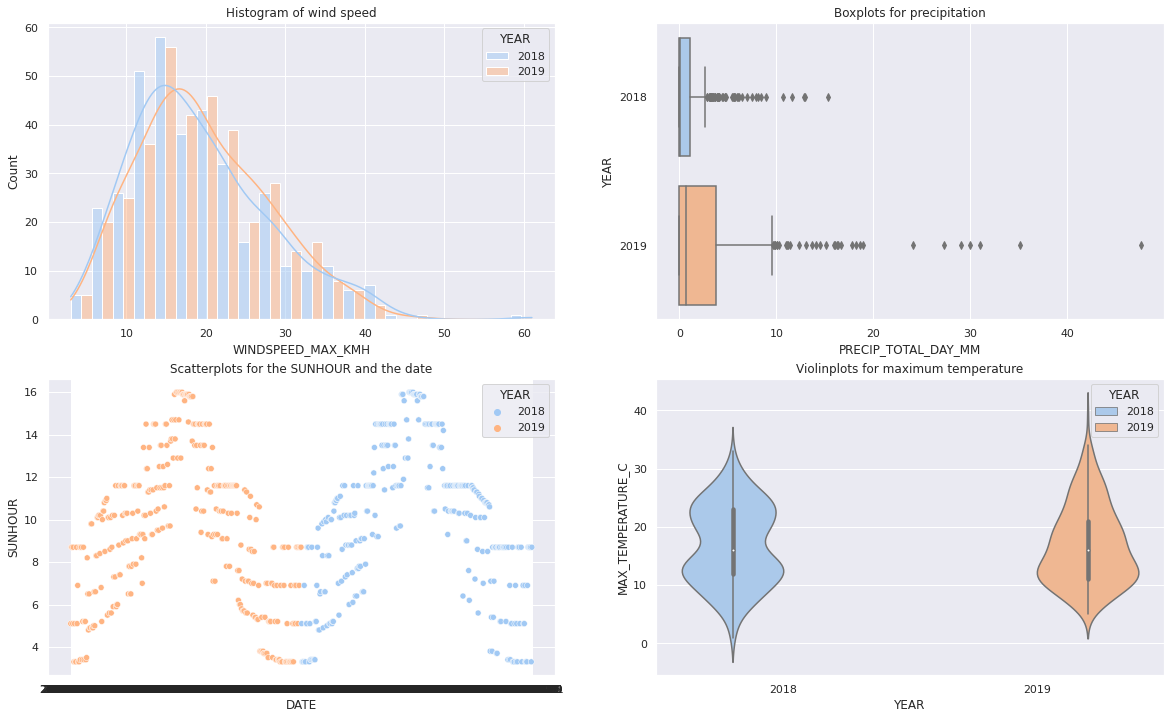

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

sns.histplot(ax=axes[0,0], data = result, x="WINDSPEED_MAX_KMH", hue="YEAR", multiple="dodge", palette="pastel", kde=True)
axes[0,0].set_title('Histogram of wind speed')


sns.boxplot(ax=axes[0,1], data = result, x="PRECIP_TOTAL_DAY_MM", y="YEAR", orient="h", palette="pastel")
axes[0,1].set_title('Boxplots for precipitation')


sns.scatterplot(ax=axes[1,0], data = result, x = 'DATE', y = "SUNHOUR", hue="YEAR", palette="pastel", units=None)
axes[1,0].set_title('Scatterplots for the SUNHOUR and the date')


sns.violinplot(ax=axes[1,1], data = result, x = 'YEAR', y = "MAX_TEMPERATURE_C",hue="YEAR", palette= "pastel")
axes[1,1].set_title('Violinplots for maximum temperature')